In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv(r"C:\Users\Hi\OneDrive\Desktop\DATA ANALYTICS PROJECTS\Predicting House Prices with Linear Regression\Housing.csv"))

In [3]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.shape
    

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

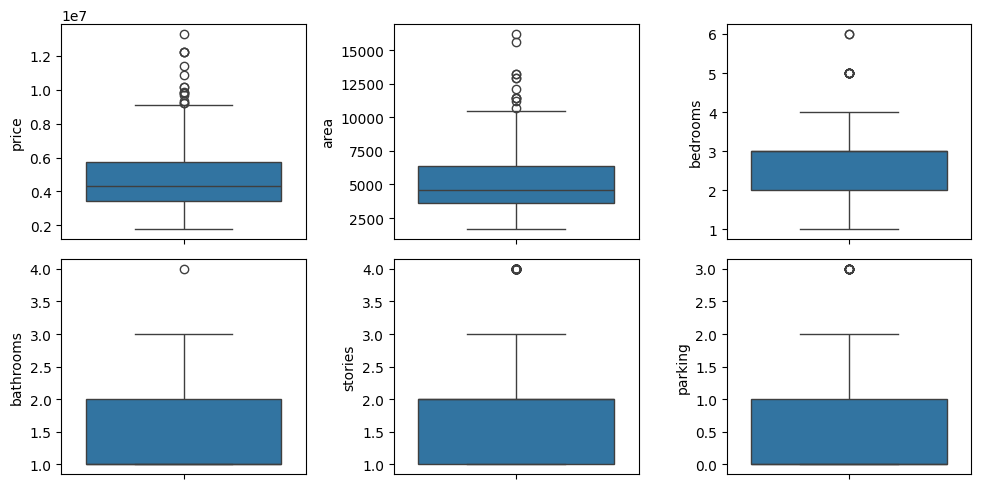

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

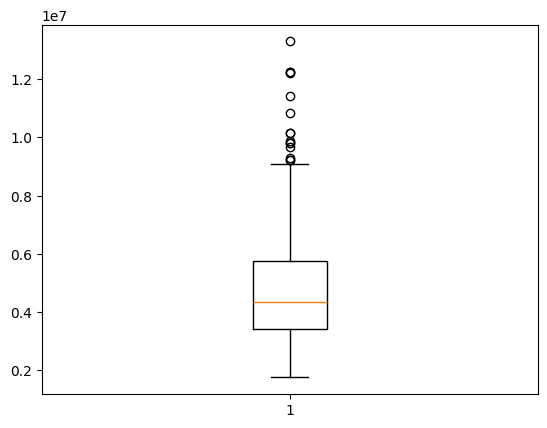

In [9]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

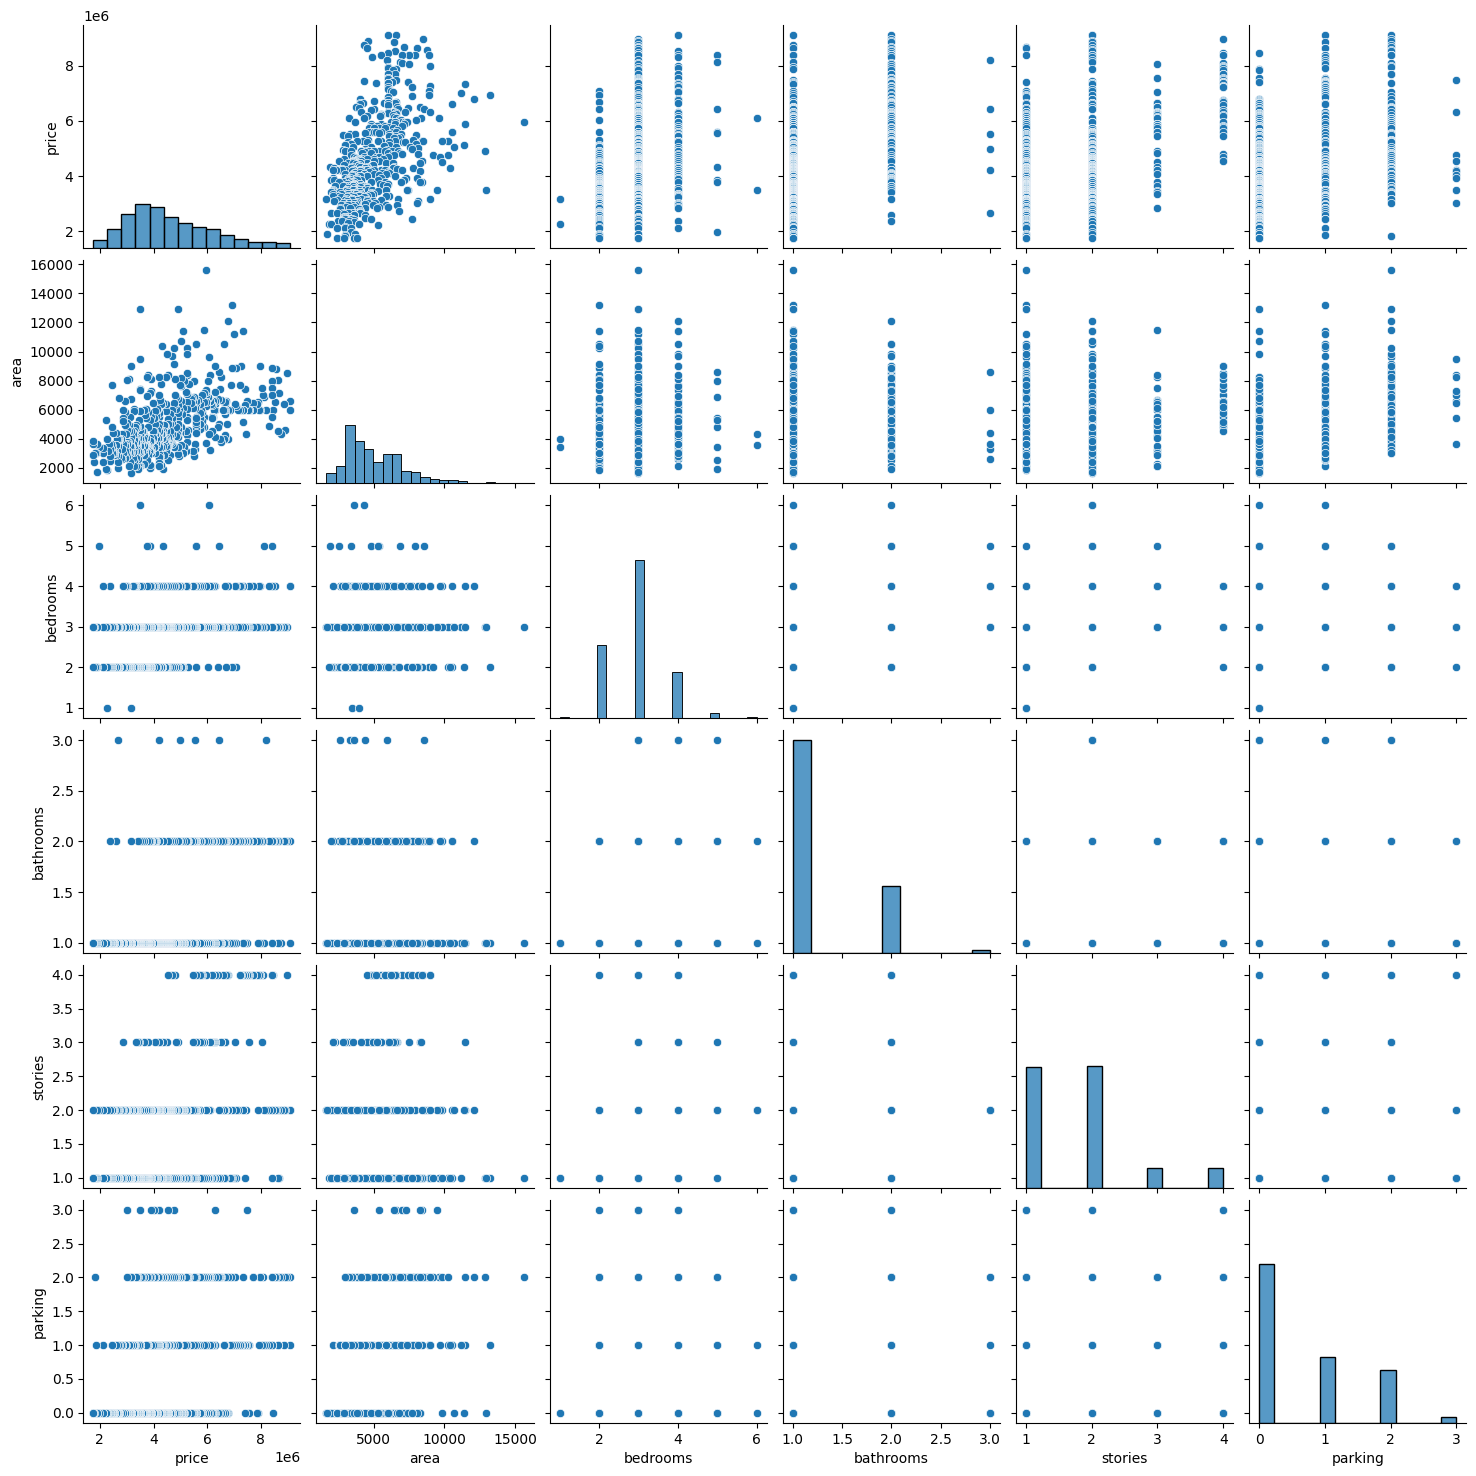

In [10]:
sns.pairplot(housing)
plt.show()

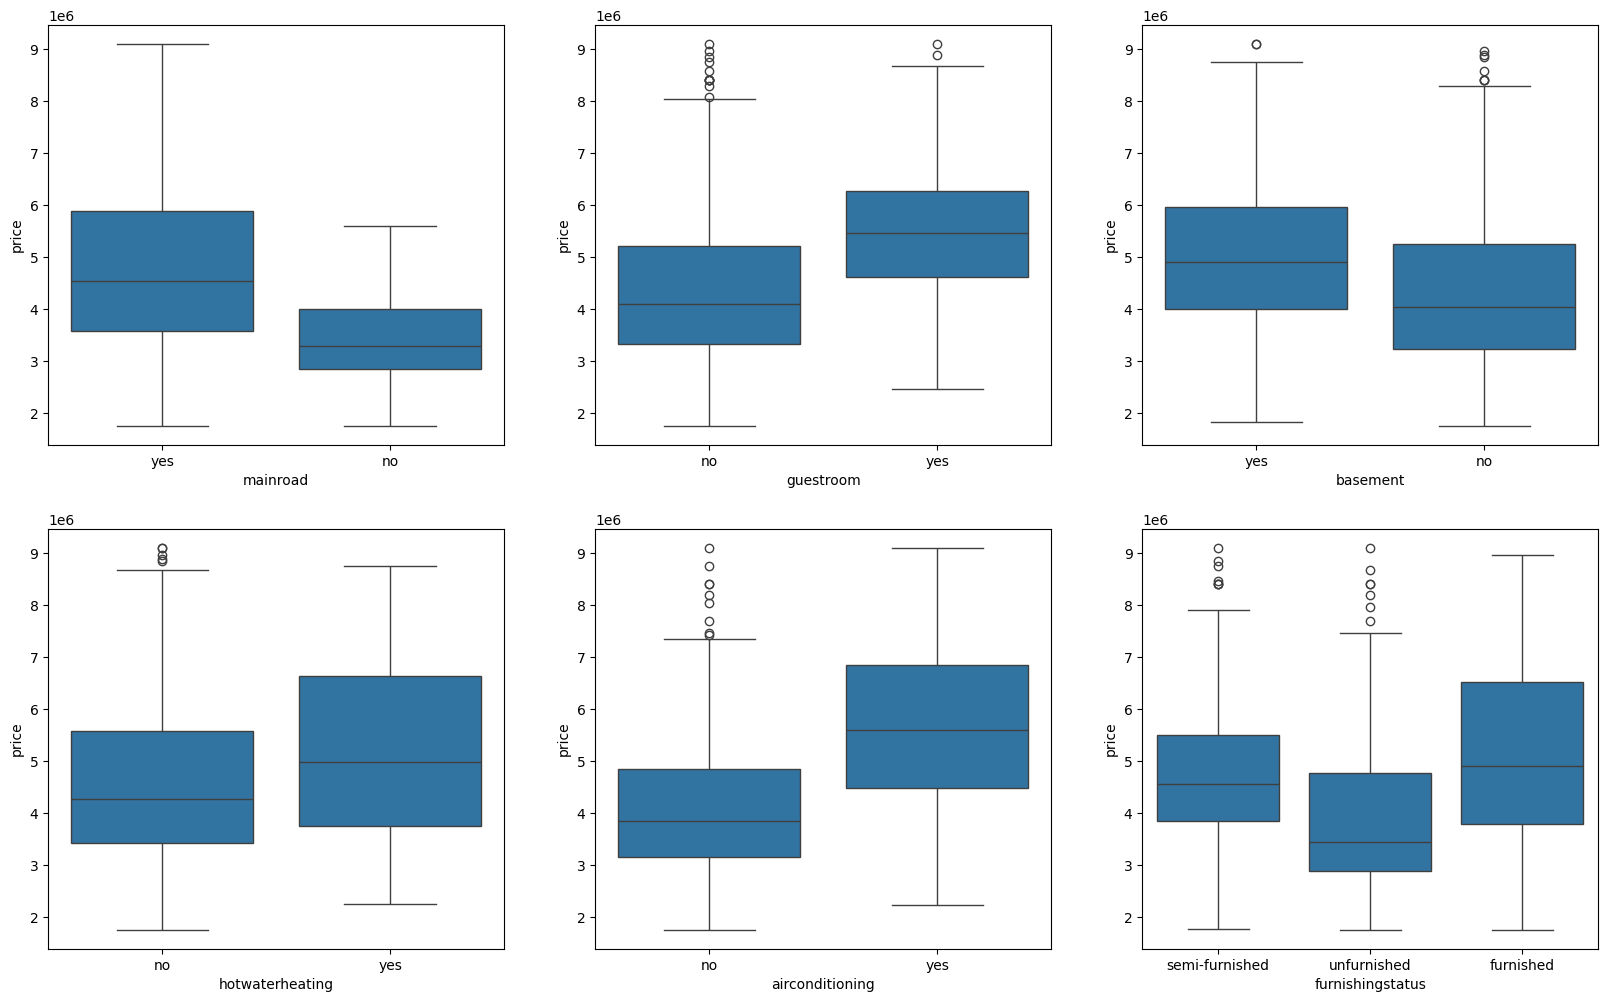

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

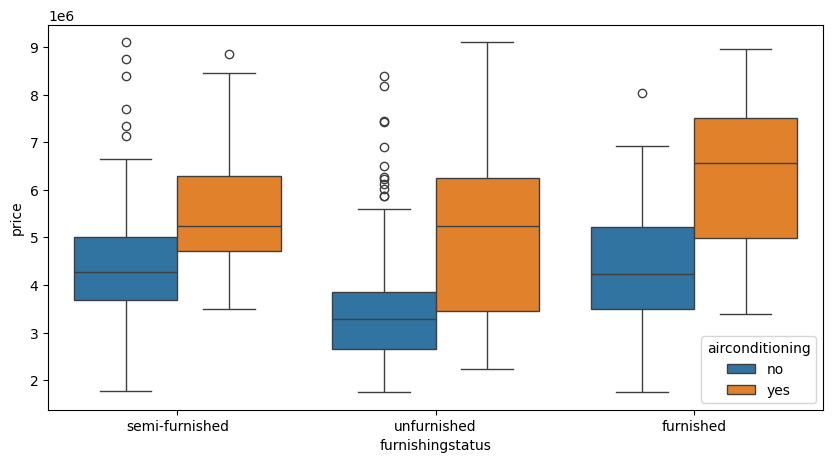

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [13]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [14]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [15]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [16]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [17]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
48,0.776190,0.189964,0.4,0.5,0.333333,1,0,1,0,0,0.333333,0,False,True
465,0.176190,0.154122,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,False,True
144,0.523810,0.218638,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,False,False
395,0.238095,0.139785,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,False,True
254,0.371429,0.205018,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,True,False


In [20]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.386021,0.241122,0.389757,0.125337,0.261456,0.846361,0.172507,0.350404,0.048518,0.309973,0.219227,0.210243
std,0.212167,0.143626,0.144831,0.226142,0.277672,0.361089,0.378331,0.477741,0.215147,0.463107,0.282378,0.408031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238095,0.136559,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.342857,0.204301,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.523810,0.327957,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


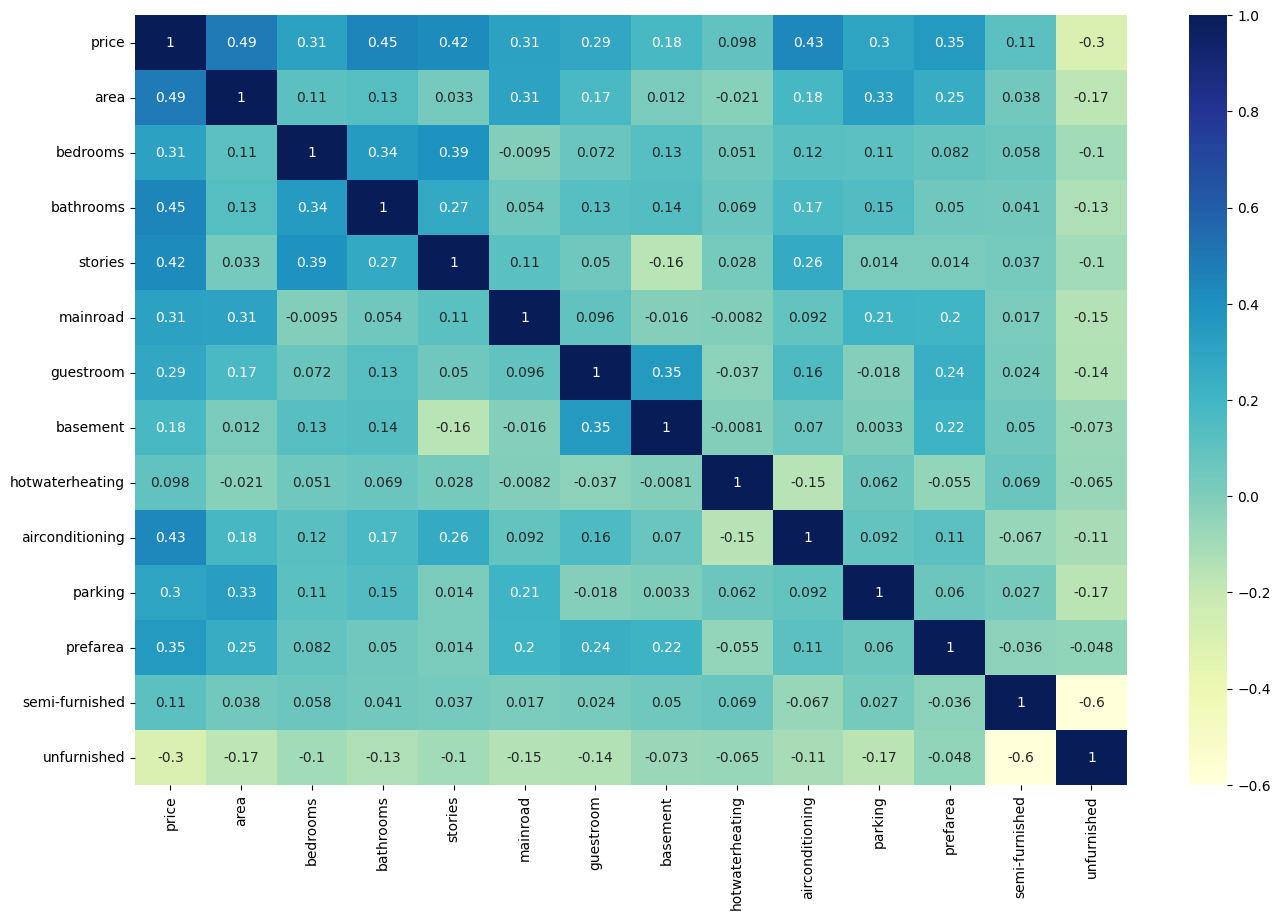

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [22]:
y_train = df_train.pop('price')
X_train = df_train

In [23]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
rfe = RFE(lm, n_features_to_select=6)  # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', np.True_, np.int64(1)),
 ('bedrooms', np.False_, np.int64(7)),
 ('bathrooms', np.True_, np.int64(1)),
 ('stories', np.True_, np.int64(1)),
 ('mainroad', np.False_, np.int64(5)),
 ('guestroom', np.False_, np.int64(6)),
 ('basement', np.False_, np.int64(4)),
 ('hotwaterheating', np.True_, np.int64(1)),
 ('airconditioning', np.True_, np.int64(1)),
 ('parking', np.False_, np.int64(2)),
 ('prefarea', np.True_, np.int64(1)),
 ('semi-furnished', np.False_, np.int64(8)),
 ('unfurnished', np.False_, np.int64(3))]

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 


In [30]:
%pip install statsmodels
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

You should consider upgrading via the 'c:\Users\Hi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     90.72
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           3.19e-69
Time:                        00:41:59   Log-Likelihood:                 218.90
No. Observations:                 371   AIC:                            -423.8
Df Residuals:                     364   BIC:                            -396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [31]:
%pip install statsmodels
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Hi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


,Features,VIF
0,const,4.72
5,airconditioning,1.16
3,stories,1.15
2,bathrooms,1.11
1,area,1.11
6,prefarea,1.07
4,hotwaterheating,1.04


Text(0.5, 0, 'Errors')

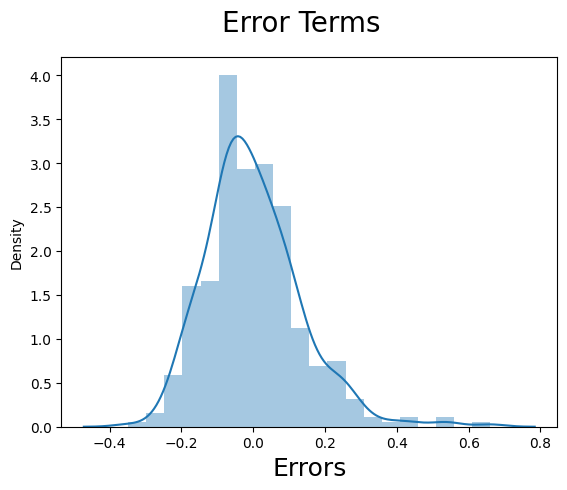

In [32]:
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

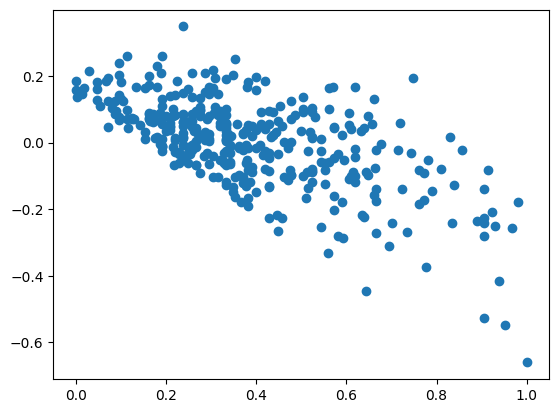

In [33]:
plt.scatter(y_train,res)
plt.show()

In [34]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [35]:
y_test = df_test.pop('price')
X_test = df_test
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]
# Making predictions
y_pred = lm.predict(X_test_rfe)
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5832154960181067

Text(0, 0.5, 'y_pred')

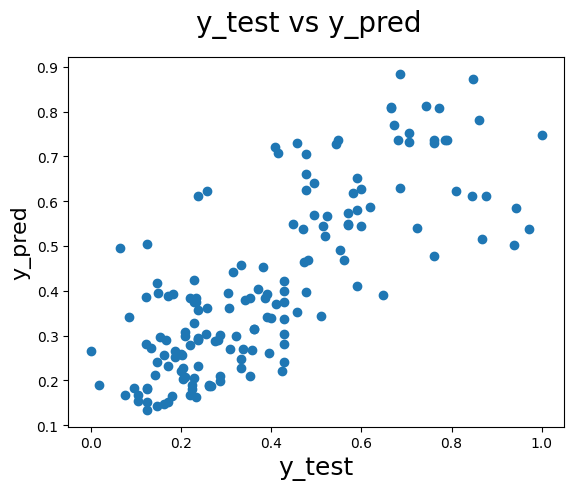

In [36]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label